In [2]:
import pandas as pd
final_year = pd.read_csv("final_tmdb_data_2001.csv.gz")
final_year.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1105.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0118154,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,292980.0,en,White Hotel,...,0.0,90.0,"[{'english_name': 'Amharic', 'iso_639_1': 'am'...",Released,NaN,White Hotel,0.0,0.0,0.0,NaN
4,tt0118589,0.0,/bLntSfsqUheiUirdV9Ts8znqsTM.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.6,115.0,PG-13


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [3]:
final_year.drop(final_year[final_year['certification'] == "NaN"].index, inplace = True)

- How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [4]:
mov_cert= final_year.groupby('certification')
mov_cert.count()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
certification,,,,,,,,,,,,,,,,,,,,,
-,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,1
G,12,12,9,5,12,12,3,12,12,12,...,12,12,12,12,12,9,12,12,12,12
NR,35,35,13,1,35,35,7,35,35,35,...,35,35,35,35,35,15,35,35,35,35
PG,35,35,22,9,35,35,10,35,35,35,...,35,35,35,35,35,23,35,35,35,35
PG-13,96,96,80,13,96,96,13,96,96,96,...,96,96,96,96,96,79,96,96,96,96
R,232,232,166,12,232,232,25,232,232,232,...,232,232,232,232,232,170,232,232,232,232


R        232
PG-13     96
NR        35
PG        35
G         12
-          1
Name: certification, dtype: int64


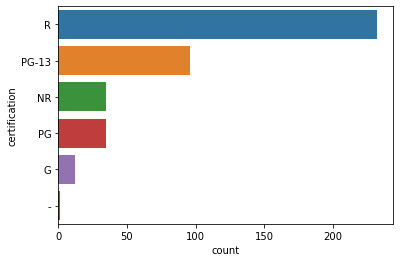

In [5]:
import seaborn as sns
sns.countplot(data=final_year, y='certification',order=final_year.certification.value_counts().index);
print(final_year['certification'].value_counts())

What is the average revenue per certification category? and
What is the average budget per certification category?

In [6]:
mov_cert= final_year.groupby('certification')
mov_cert.mean()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
certification,,,,,,,,,
-,0.0,0.000000e+00,172550.000000,0.831000,0.000000e+00,90.000000,0.000000,5.000000,7.000000
G,0.0,1.766667e+07,45934.666667,24.900667,7.409790e+07,81.750000,0.083333,5.266667,1726.750000
NR,0.0,5.057143e+05,261883.828571,4.308229,1.757042e+06,95.400000,0.000000,3.745714,61.314286
PG,0.0,2.159571e+07,65283.600000,26.506314,7.293338e+07,95.028571,0.000000,6.105714,1826.600000
PG-13,0.0,2.987185e+07,52407.625000,13.380313,7.061941e+07,102.760417,0.000000,5.569792,1301.281250
R,0.0,1.078689e+07,59317.478448,8.830216,1.782364e+07,100.866379,0.000000,5.441379,454.607759
